# Пример, Kanji, критерий 1

Линия по производству пудры должна обеспечивать средний вес пудры в
упаковке 4 грамма, заявленное стандартное отклонение — 1 грамм.
В ходе инспекции выбрано 9 упаковок, средний вес продукта в них составляет
4.6 грамма.

$H_0$: средний вес пудры в упаковке соответствует норме.

$H_1$: средний вес пудры в упаковке не соответствует норме.

```p=0.0719```

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math
%matplotlib inline

Проверим критерий "вручную":

$Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}.$

$p(Z) = 2 \bigl(1-F(|Z|)\bigr).$

In [2]:
mu = 4
std = 1
n = 9
mean = 4.6

In [3]:
Z = (mean - mu)/std*math.sqrt(n)
Z

1.799999999999999

In [4]:
def F(Z):
    return st.distributions.norm.cdf(Z)
p = 2*(1-F(Z))
p

0.07186063822585176

Просэмплируем похожую выборку и проверим критерий с использованием библиотеки ```statsmodels```

In [5]:
rs = np.random.RandomState(5)
X = rs.randn(n) * std + 4.3
np.mean(X), np.std(X)

(4.596429057120655, 1.0118035250351838)

In [6]:
from statsmodels.stats.weightstats import ztest
ztest(X, value=mu)

(1.667276384600652, 0.0954594601765454)

# Кобзарь, задача 227

Нормируемый уровень дефектных изделий в партии $p_0 = 0.05$. Среди 20 изделий
партии проверка обнаружила 2 дефектных.

$H_0$ : доля дефектных изделий в партии не выше нормы.

$H_1$ : доля дефектных изделий в партии выше нормы.

Для биномиального критерия ```p=0.2642```.

Проверим критерий "вручную":

$T = \sum X_i$

$p(T) = 1 - F(T)$ 

In [7]:
T = 2
n = 20
p = 0.05

In [8]:
1 - st.binom(n, p).cdf(T)

0.07548367378849652

Проверим критерий с использованием библиотеки ```scipy```.

In [9]:
st.binom_test(T, n, p, alternative='greater')

0.26416047505615026

```statsmodels```

In [10]:
from statsmodels.stats.proportion import binom_test

In [11]:
binom_test(T, n, p, alternative='larger')

0.26416047505615026

# Антиконсервативность интервалов доверия

Построим график попадания параметра распределения Бернулли в 95%-доверительный интервал.

In [12]:
from statsmodels.stats.proportion import proportion_confint
N_exp = 100
n = 40
p_array =  np.arange(0.05,0.95,0.01)

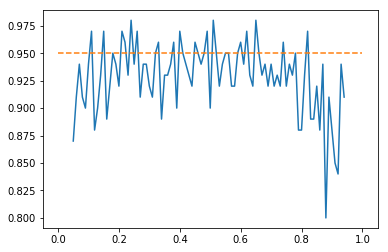

In [19]:
plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)
        left, right = (proportion_confint(X, n))
        if left <= p <= right:
            success += 1.0
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

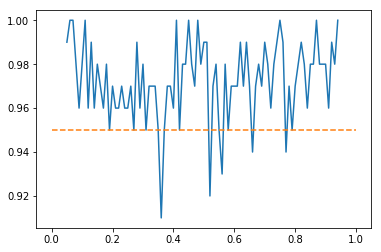

In [22]:
plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)        
        left, right = (proportion_confint(X, n, method='beta'))
        if left <= p <= right:
            success += 1
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

# Бонд, продолжение

Пусть Бонд выбрал взболтанный мартини в 12 случаев из 16.

Требуется:
1. Проверить гипотезу о равнозначности мартини методами ```binom_test```, ```proportions_chisquare```, 
```proportions_ztest```.


2. Провести симуляцию, построить зависимость pow от истинного значения p для выборок мощностью 5, 10, 20, 100, 1000 для разных методов.

3. Провести симуляцию, построить зависимость ошибки первого рода от проверяемого значения $p_0$ при истинном значении p=0.5 для разных методов и мощностей выборки.

In [26]:
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare

In [27]:
# ваш код
binom_test(12, 16, 0.5),  proportions_ztest(12, 16, 0.5), proportions_chisquare(12, 16, 0.5)

(0.076812744140625,
 (2.3094010767585034, 0.020921335337794014),
 (4.0, 0.04550026389635857, (array([[12,  4]]), array([[8., 8.]]))))

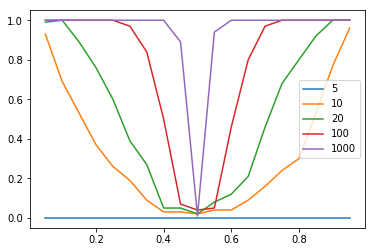

In [29]:
ns = [5, 10, 20, 100, 1000]
for n in ns:
    X = []
    Y = []
    for p in np.arange(0.05, 0.96, 0.05):
        success = 0
        for _ in range(100):
            x_ = np.random.binomial(n, p)
            if binom_test(x_, n, 0.5) <= 0.05:
                success +=1
                
        X.append(p)
        Y.append(success/100)
    plt.plot(X, Y, label = str(n))
plt.legend(loc = 'best')